<a href="https://colab.research.google.com/github/Esplenio79/Intro/blob/main/Cotizaciones_Automatizadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatización Cotizaciones Yahoo Finanzas 📈

# NUEVA FEATURE EN TEST:

Agrego cotizaciones del dolar desde infobae. Pero solo valores de "hoy"

## Tutorial ##
Agregar o quitar las acciones que corresponda de **lista_acciones** , corregir la **fecha_inicio**, la **fecha_fin** siempre sera la del dia de "HOY"






**Autor:** guillermo.palmieri23@gmail.com -
[Linkedin](https://www.linkedin.com/in/guillermo-palmieri-/)


In [4]:
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [5]:
import yfinance as yf
import datetime as dt
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import requests
import datetime
from bs4 import BeautifulSoup

from google.colab import files
# Acciones que componen tu cartera de inversiones
lista_acciones = ["AAPL","AVGO","BAC","CMCSA","DIS","JPM","KO","PFE","RTX","VZ","WFC","ZIM"]

# Rango de fechas
fecha_inicio='2023-07-24'
fecha_fin= dt.datetime.now().date() #Siempre genera la fecha de "HOY"
cantidad_dias= (pd.to_datetime(fecha_fin)-pd.to_datetime(fecha_inicio)).days

# Traigo informacion de INFOBAE
req = requests.get("https://www.infobae.com/economia")
soup = BeautifulSoup(req.text)
dolar = soup.select("div .exchange-dolar-container ")
cotizacion_dolar = {}


In [7]:
cotizaciones_unificadas = []

#Recorro todas las cotizaciones que me da Y-Finance y las agrego a una lista

for accion in lista_acciones:
  dataframe_cotizaciones = yf.download(accion,fecha_inicio, fecha_fin, progress=False)

  # dataframe_cotizaciones["Market Cap"] = yf.Ticker(accion).info["marketCap"]
  # dataframe_cotizaciones["P/E Ratio"] = yf.Ticker(accion).info["trailingPE"]
  # Usar el método shift() para obtener la fila anterior
  dataframe_cotizaciones['Valor_anterior'] = dataframe_cotizaciones['Close'].shift(1)

  # Calcular la diferencia y asignarla a una nueva columna
  dataframe_cotizaciones['Variacion'] = (dataframe_cotizaciones['Close'] / dataframe_cotizaciones['Valor_anterior']) - 1

  # Eliminar la columna temporal 'Valor_anterior' si ya no la necesitas
  dataframe_cotizaciones.drop('Valor_anterior', axis=1, inplace=True)

  # Agrego nombre de acciones - En forma de lista con longitud igual al tamaño del data_frame
  dataframe_cotizaciones["Accion"] = [f"{accion}"] * len(dataframe_cotizaciones)
  dataframe_cotizaciones["Nombre"] = [f"{yf.Ticker(accion).info['shortName']}"] * len(dataframe_cotizaciones)


  for div in dolar:
    for tipo in div.select(".exchange-dolar-item"):
      cotizacion_dolar[tipo.find('a', class_='exchange-dolar-title').text] = tipo.select(".exchange-dolar-amount")[0].getText() # Agrego al Dict los elementos del div

  for key,value in cotizacion_dolar.items():
    dataframe_cotizaciones[key] = value


  cotizaciones_unificadas.append(dataframe_cotizaciones)

#Lo unifico todos
datos_combinados = pd.concat(cotizaciones_unificadas, ignore_index=False)
datos_combinados.to_excel(f"Cotizaciones_Unificadas.xlsx",sheet_name="Cotizaciones") #index=False
files.download('Cotizaciones_Unificadas.xlsx')

HTTPError: ignored

# Sección en Prueba - Graficos




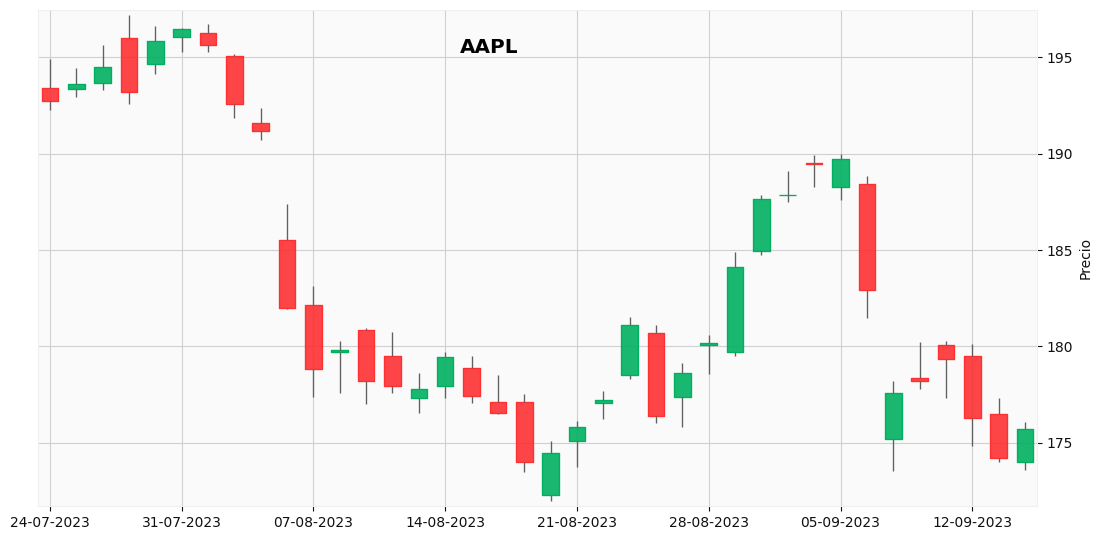

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


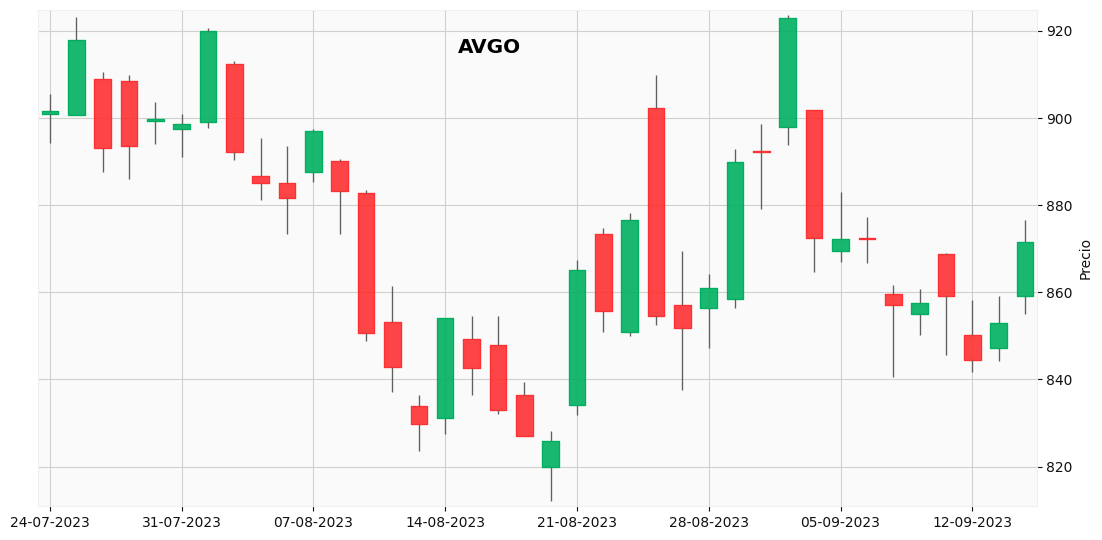

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


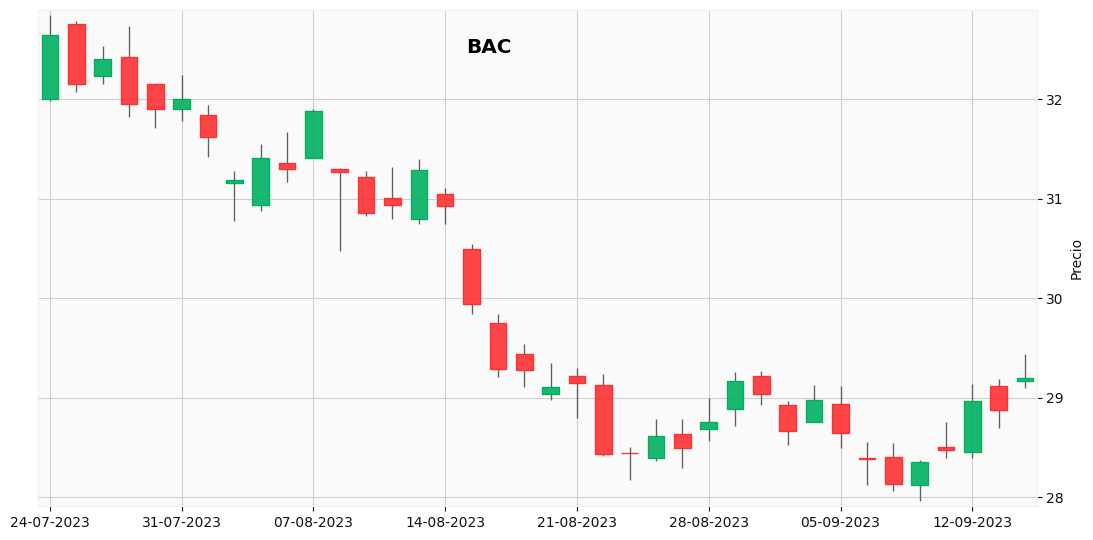

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


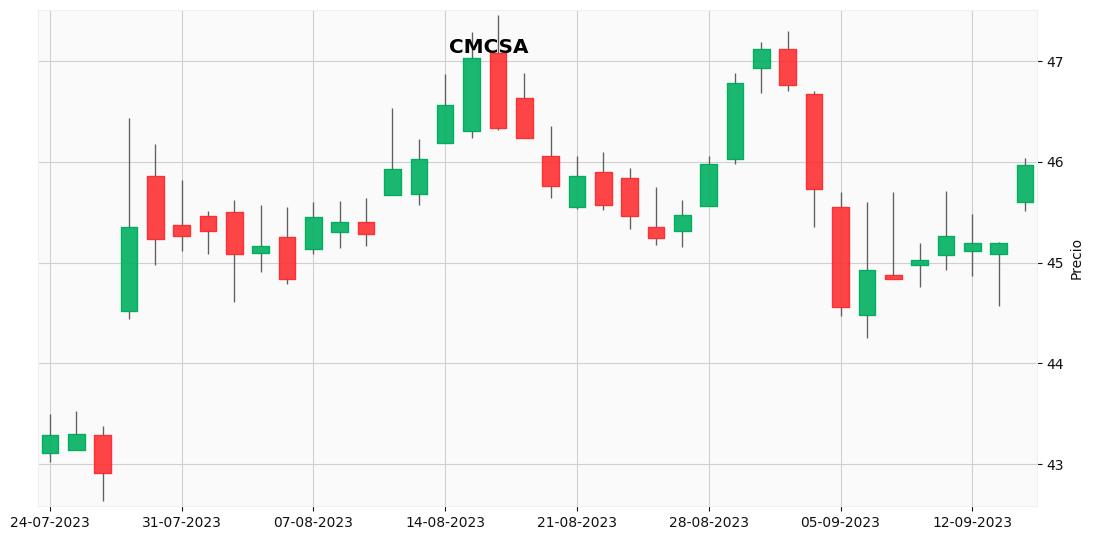

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


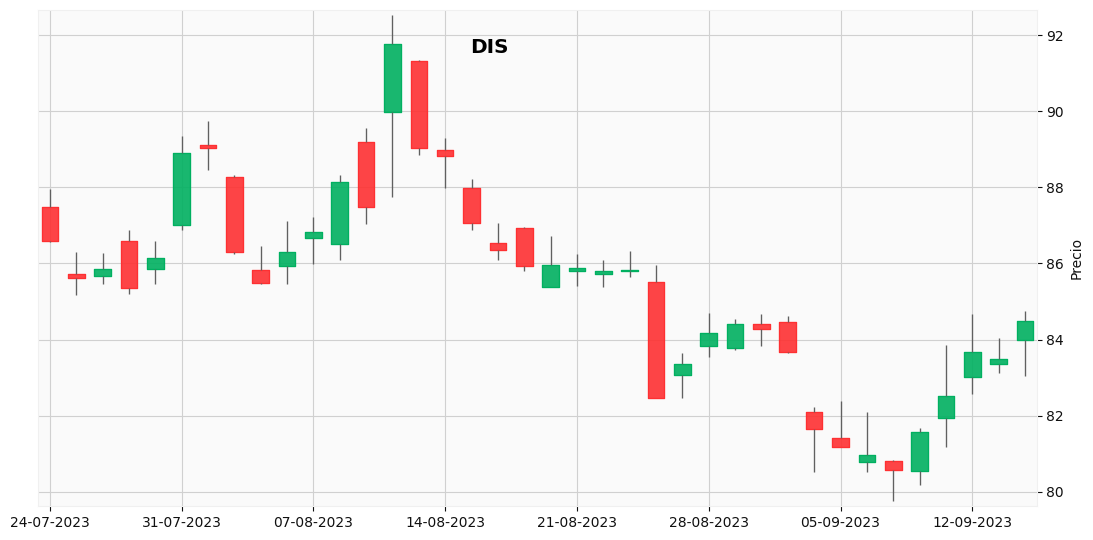

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


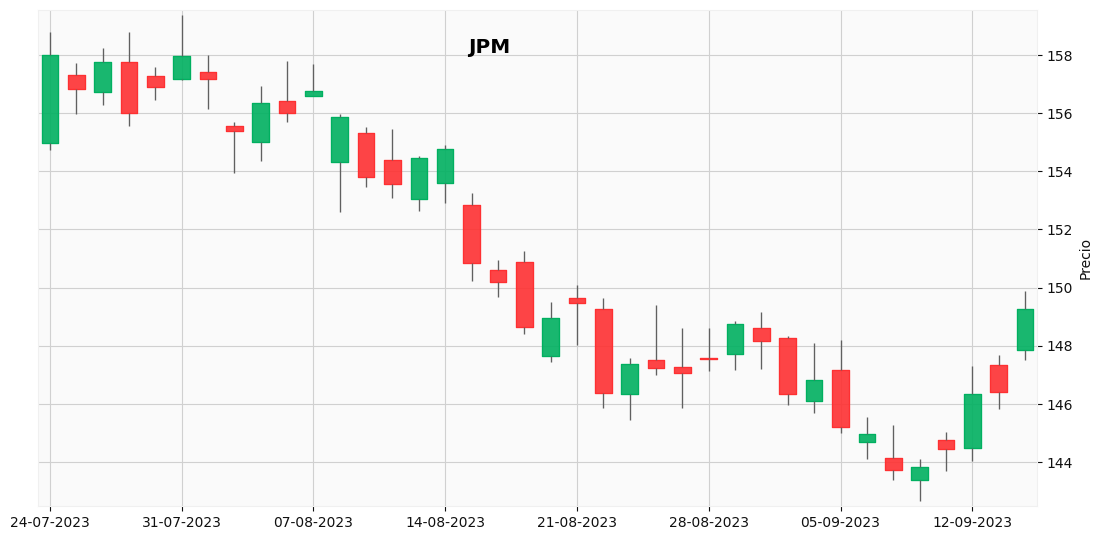

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


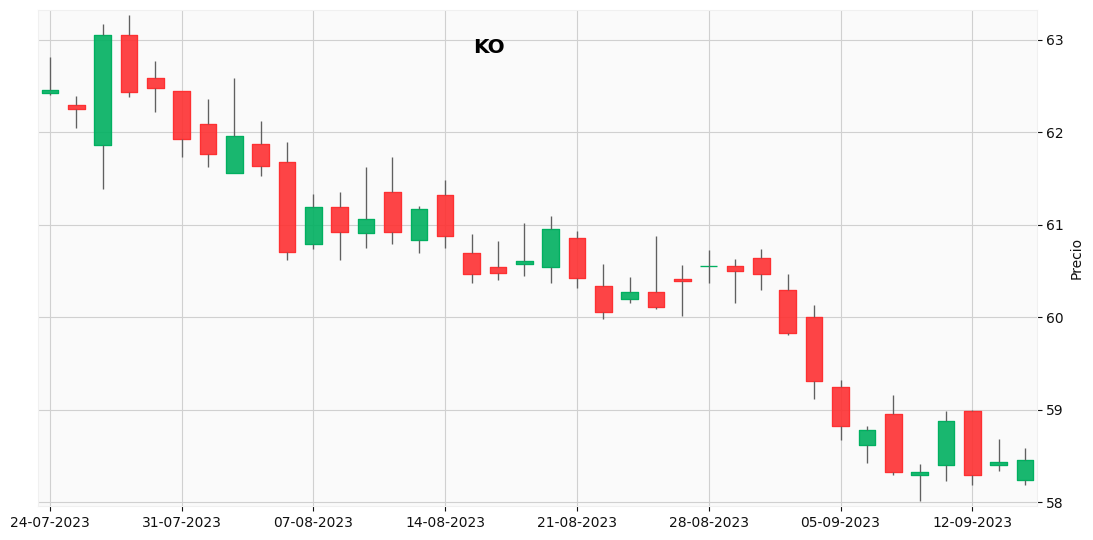

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


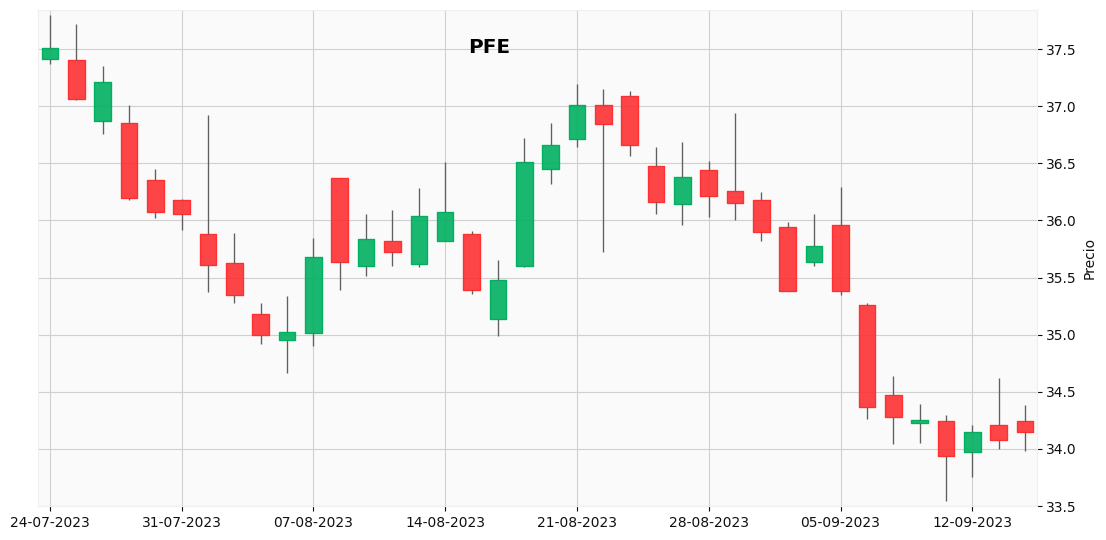

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


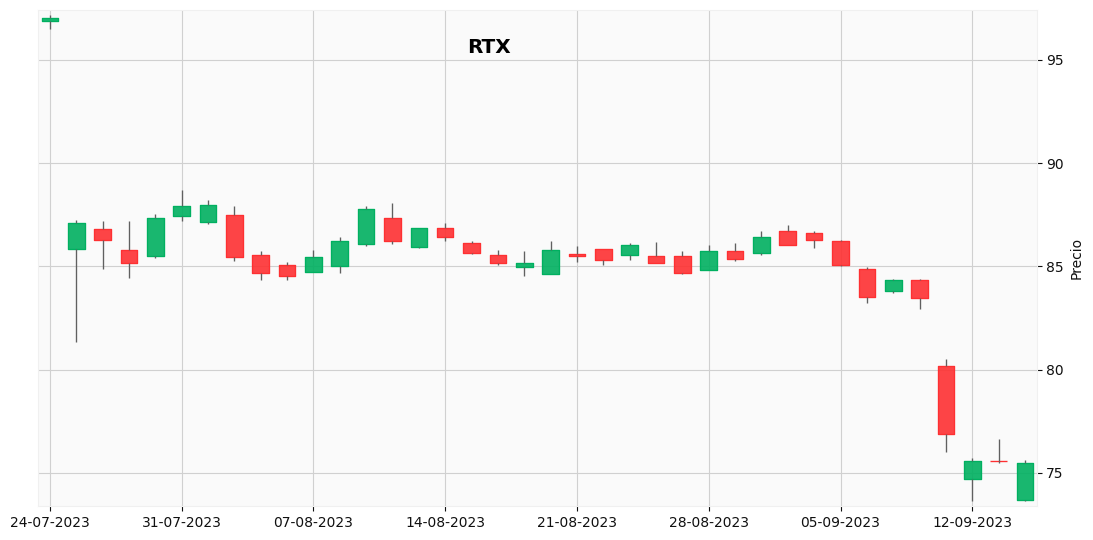

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


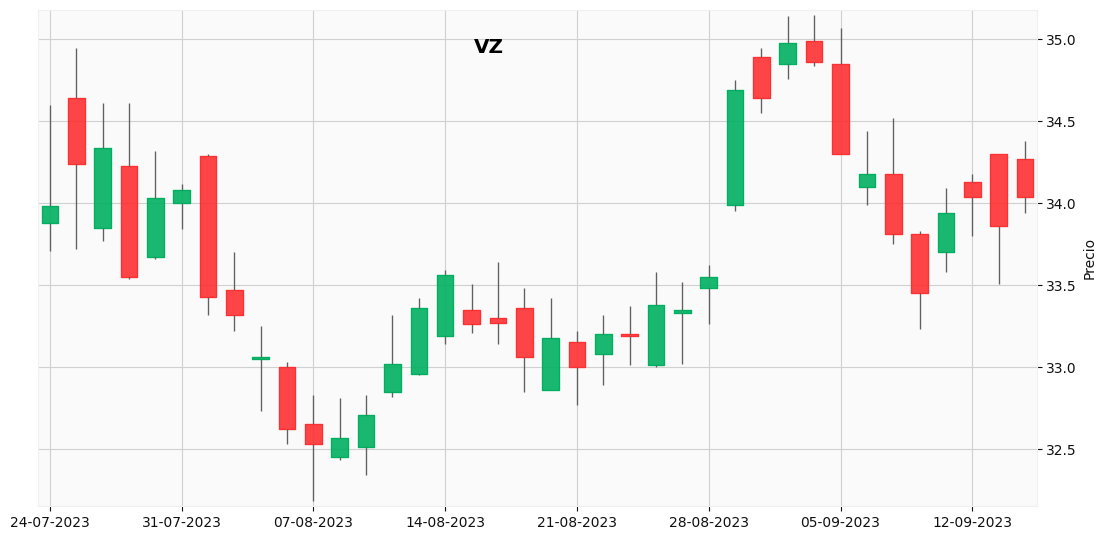

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


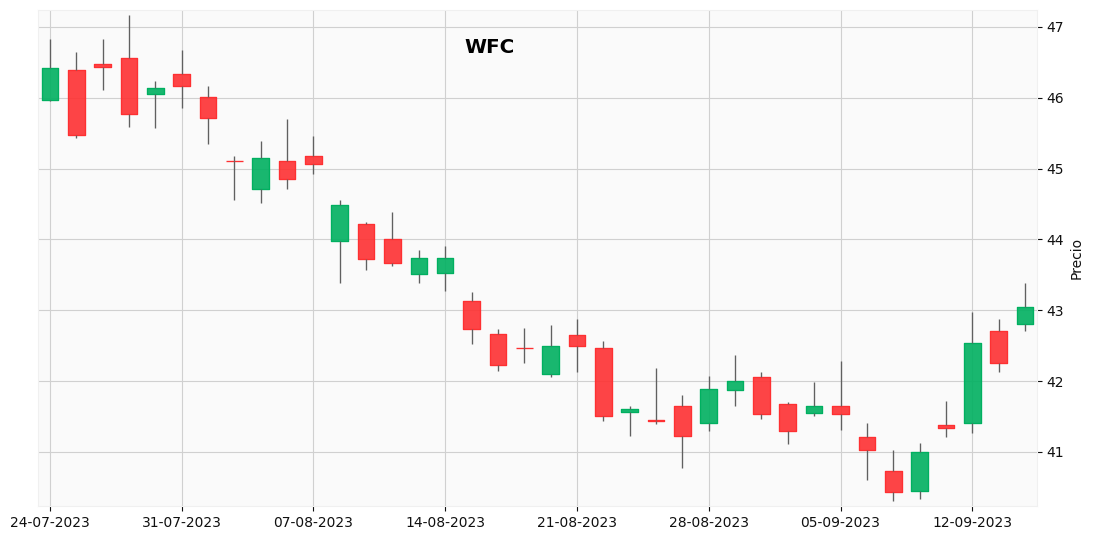

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


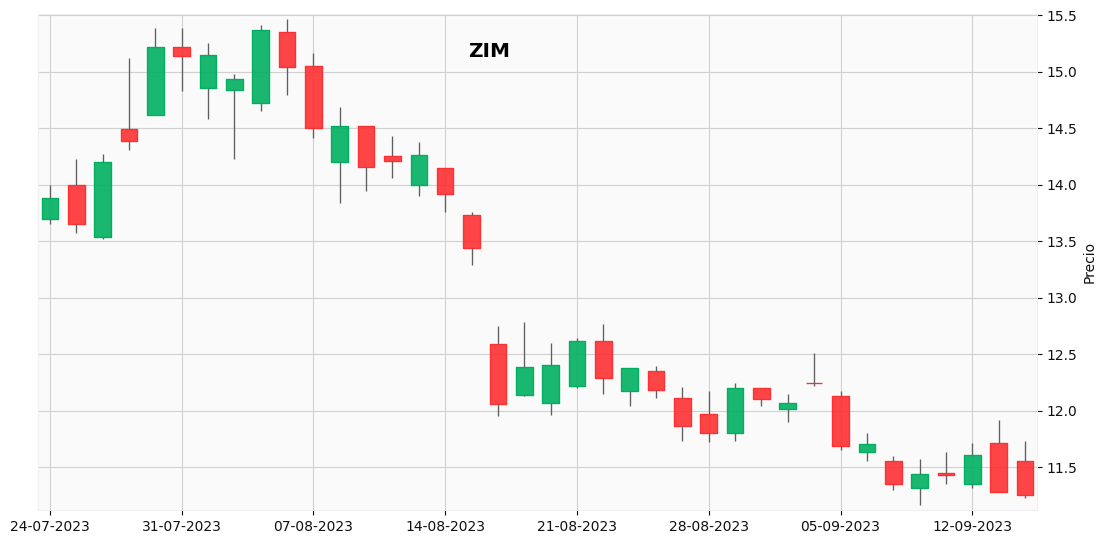

- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -- - - - - - - - - - - - - - - -


In [ ]:
for accion in cotizaciones_unificadas:
  # Crear el gráfico de velas directamente con dataframe_cotizaciones
  mpf.plot(accion, type='candle', style='yahoo', title=f'{accion["Accion"][0]}', ylabel='Precio', figratio=(12, 6),xrotation=0, datetime_format='%d-%m-%Y', tight_layout=True)
  print("- - - - - - - - - - - - - - - -"*4)
  plt.show()
